# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(len(cities))

613


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#basic url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#Print beginning
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
city_counter = 1
set_counter = 1

# Create the lists
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
         
    # Create API url for each city
    query_url = url +"&q=" + city
    
    # json respose
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    city_counter += 1
    
   # Add values
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass

# Print ends
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

 4 of Set 4 | sungaipenuh
Processing Record 5 of Set 4 | morgan city
Processing Record 6 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 4 | songea
Processing Record 8 of Set 4 | katobu
Processing Record 9 of Set 4 | kostomuksha
Processing Record 10 of Set 4 | saskylakh
Processing Record 11 of Set 4 | katsuura
Processing Record 12 of Set 4 | juegang
Processing Record 13 of Set 4 | iaciara
Processing Record 14 of Set 4 | vardo
Processing Record 15 of Set 4 | beibei
Processing Record 16 of Set 4 | nabire
Processing Record 17 of Set 4 | zolotinka
City not found. Skipping...
Processing Record 18 of Set 4 | menongue
Processing Record 19 of Set 4 | harper
Processing Record 20 of Set 4 | saint-ghislain
Processing Record 21 of Set 4 | yumen
Processing Record 22 of Set 4 | itanagar
Processing Record 23 of Set 4 | buldana
Processing Record 24 of Set 4 | clyde river
Processing Record 25 of Set 4 | morondava
Processing Record 26 of Set 4 | conakry
Processing Record 27

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictionary
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create and display the data frame
weather_df = pd.DataFrame(weather_data)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Moba,84,CN,1616829452,25,33.2288,105.0179,63.07,6.60
1,Kapaa,20,US,1616829452,88,22.0752,-159.3190,73.40,9.22
2,Saint-Philippe,0,RE,1616829453,70,-21.3585,55.7679,84.20,8.05
3,East London,0,ZA,1616829453,64,-33.0153,27.9116,71.60,17.27
4,Den Helder,40,NL,1616829453,70,52.9599,4.7593,43.00,25.32


In [6]:
weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,567.000000,5.670000e+02,567.000000,567.000000,567.000000,567.000000,567.000000
mean,54.398589,1.616830e+09,70.292769,19.477850,17.229172,57.734127,7.605168
std,40.715464,7.908819e+01,22.638791,33.357771,90.171170,25.905441,5.566822
min,0.000000,1.616829e+09,6.000000,-54.800000,-175.200000,-33.230000,0.250000
25%,8.500000,1.616829e+09,61.000000,-8.055950,-65.213400,41.000000,3.510000
50%,71.000000,1.616830e+09,75.000000,22.690600,23.283300,64.510000,6.200000
75%,98.000000,1.616830e+09,87.000000,47.674950,96.147600,77.000000,10.250000
max,100.000000,1.616830e+09,100.000000,78.218600,179.316700,100.400000,38.410000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,567.000000,5.670000e+02,567.000000,567.000000,567.000000,567.000000,567.000000
mean,54.398589,1.616830e+09,70.292769,19.477850,17.229172,57.734127,7.605168
std,40.715464,7.908819e+01,22.638791,33.357771,90.171170,25.905441,5.566822
min,0.000000,1.616829e+09,6.000000,-54.800000,-175.200000,-33.230000,0.250000
25%,8.500000,1.616829e+09,61.000000,-8.055950,-65.213400,41.000000,3.510000
50%,71.000000,1.616830e+09,75.000000,22.690600,23.283300,64.510000,6.200000
75%,98.000000,1.616830e+09,87.000000,47.674950,96.147600,77.000000,10.250000
max,100.000000,1.616830e+09,100.000000,78.218600,179.316700,100.400000,38.410000


In [9]:
#  Get the indices of cities that have humidity over 100%.
humid_city_data = weather_df[(weather_df["Humidity"] > 100)].index

humid_city_data

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

drop_city_data = weather_df.drop(humid_city_data, inplace=False)
drop_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Moba,84,CN,1616829452,25,33.2288,105.0179,63.07,6.60
1,Kapaa,20,US,1616829452,88,22.0752,-159.3190,73.40,9.22
2,Saint-Philippe,0,RE,1616829453,70,-21.3585,55.7679,84.20,8.05
3,East London,0,ZA,1616829453,64,-33.0153,27.9116,71.60,17.27
4,Den Helder,40,NL,1616829453,70,52.9599,4.7593,43.00,25.32


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

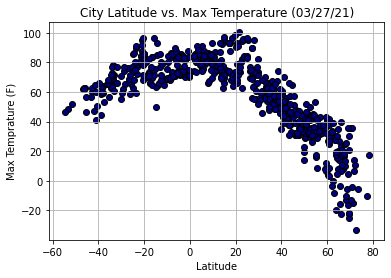

In [15]:
#latitude vs. temprature plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", facecolor = "navy", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
#plt.savefig("Output/temperature.png")
plt.show()

## Latitude vs. Humidity Plot

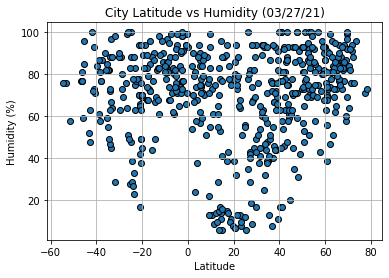

In [19]:
#Latitude vs. humidity plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.grid()
#plt.savefig("Output/humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

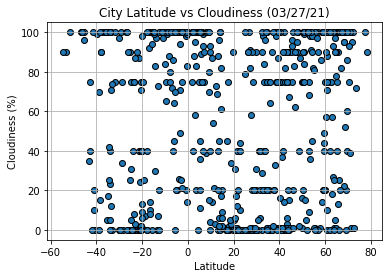

In [21]:
# Latitude vs. cloudiness plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o",  edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
#plt.savefig("Output/cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

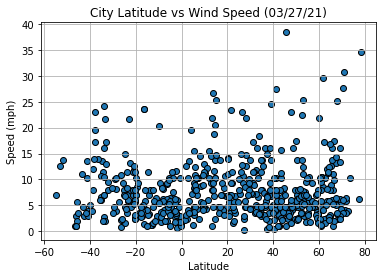

In [20]:
# Latitude vs. wind speed plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Speed (mph)")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
#plt.savefig("Output/wind_speed.png")
plt.show()

## Linear Regression

In [28]:
# Create function for linear regression
def linear_regression(x,y,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.median(),y.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue}")
    plt.show()

# Create dateframe for Northern and Southern Hemisphere
northern_hemi_df = weather_df.loc[(weather_df["Lat"] >= 0)]
southern_hemi_df = weather_df.loc[(weather_df["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8932459943504747


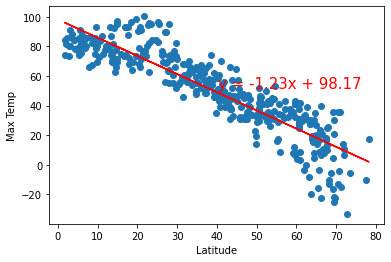

In [29]:
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
linear_regression(x, y,'Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5850785011277436


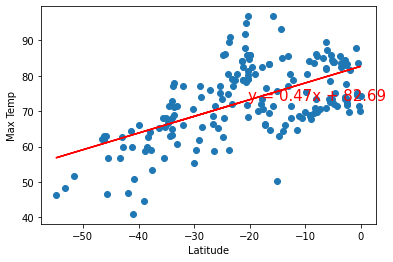

In [30]:
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
linear_regression(x, y, 'Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.35347865882488816


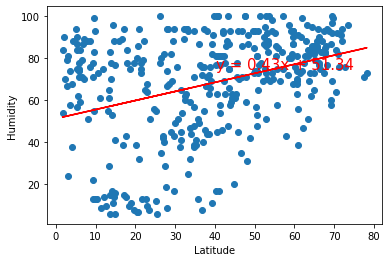

In [31]:
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
linear_regression(x, y,'Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21865296392242492


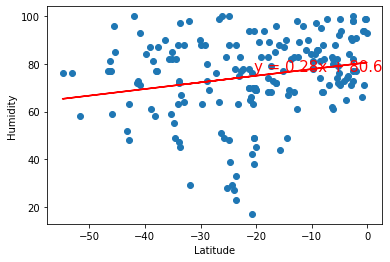

In [32]:
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
linear_regression(x, y, 'Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17392683013217305


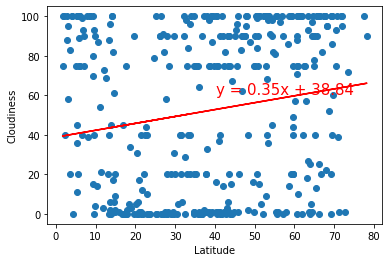

In [33]:
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
linear_regression(x, y,'Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12219447744908497


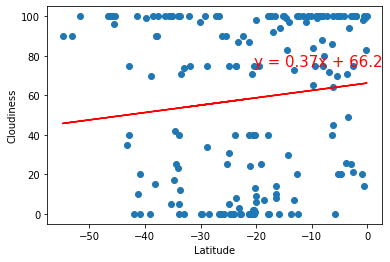

In [34]:
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
linear_regression(x, y, 'Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.03398250610931036


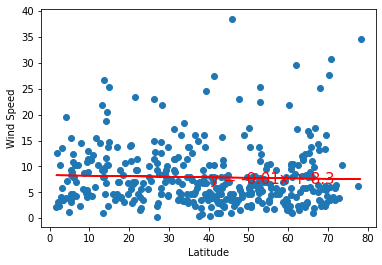

In [35]:
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
linear_regression(x, y,'Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.23680224674941552


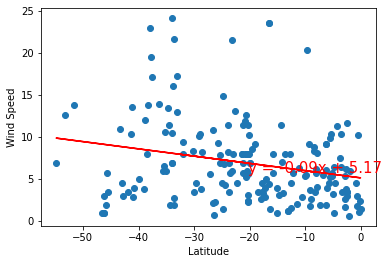

In [36]:
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
linear_regression(x, y, 'Wind Speed')